### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal :

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide     whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.




### Import Libraries

In [1]:
 # Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


## Reading the Data

In [2]:
#reading the dataset
df = pd.read_csv("train.csv")

In [3]:
# Info of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# set the max columns to none
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
# summary statistics of the dataframe
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

## Data Cleaning

In [8]:
# Number of missing values in columns
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# Checking if there are columns with one unique value which cannot be use full for analysis
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [11]:
#Replacing the missing values with the substituted values from the data dictionary
df["PoolQC"] = df["PoolQC"].fillna("No Pool")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("No Alley Access")
df["Fence"] = df["Fence"].fillna("No Fence")
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["GarageCond"] = df["GarageCond"].fillna("None")
df["GarageType"] = df["GarageType"].fillna("None")
df["GarageFinish"] = df["GarageFinish"].fillna("None")
df["GarageQual"] = df["GarageQual"].fillna("No Garage")
df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")
df["BsmtCond"] = df["BsmtCond"].fillna("None")
df["BsmtQual"] = df["BsmtQual"].fillna("None")

#Replacing the missing values by median/mode for remaining features
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].median())
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [12]:
# Check for missing values again
df.isnull().sum().sort_values(ascending=False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

In [13]:
# checkin columns 
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# Id column is not useful for the analysis. So, dropping it
df = df.drop("Id", axis = 1)

In [15]:
# Categorical columns
cat_cols = df.select_dtypes(include = "object")

In [16]:
# Numerical columns
num_cols = df.select_dtypes(exclude = "object")

In [17]:
# Display Categorical columns
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
# Display Numerical columns
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Exploratory Data Analysis

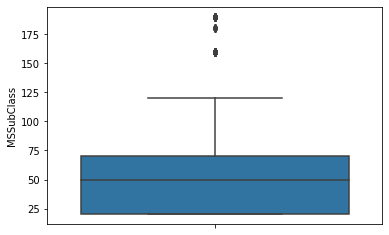

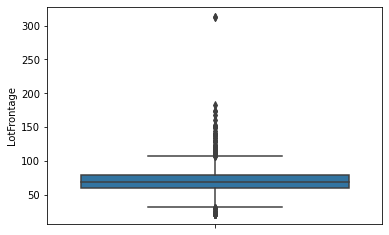

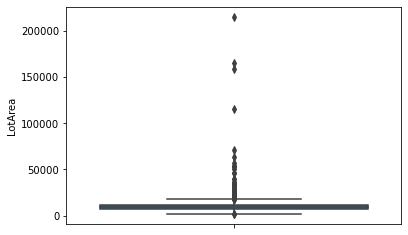

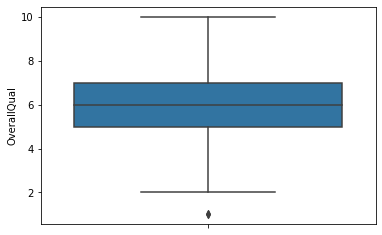

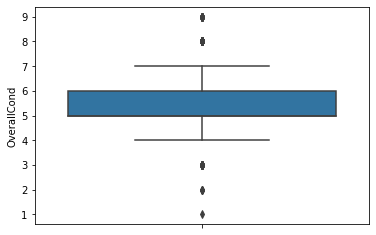

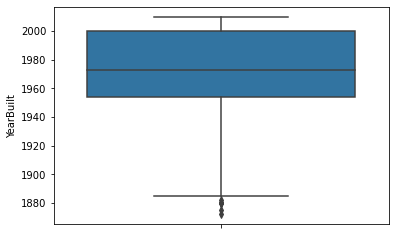

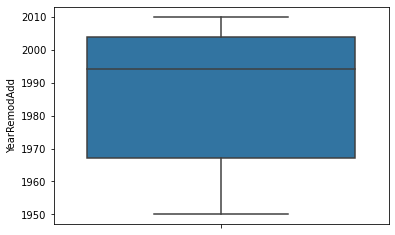

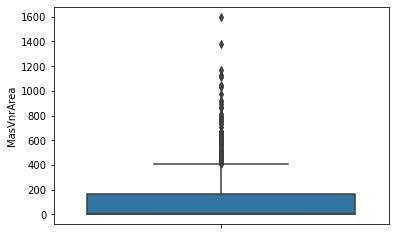

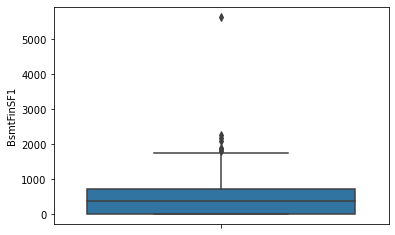

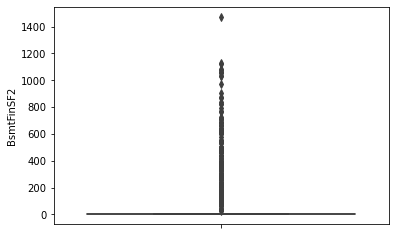

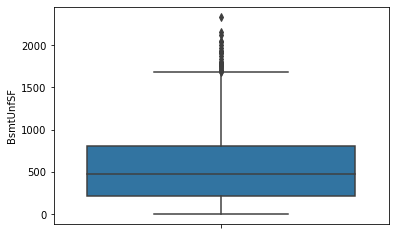

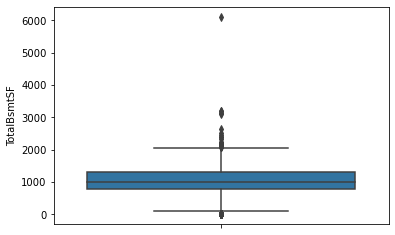

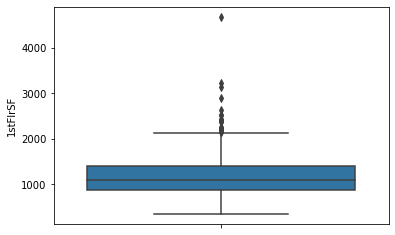

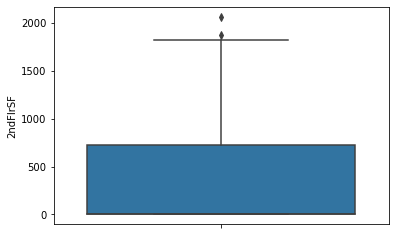

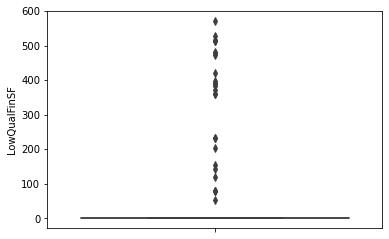

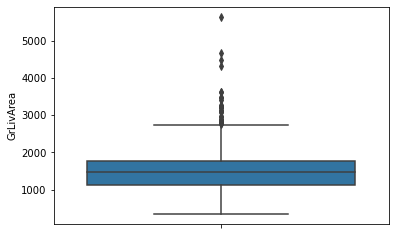

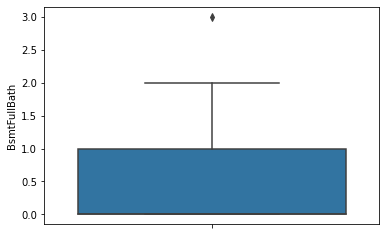

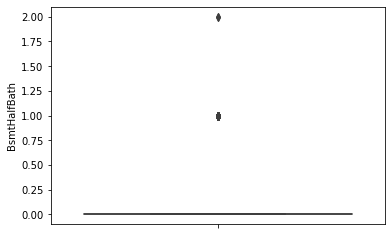

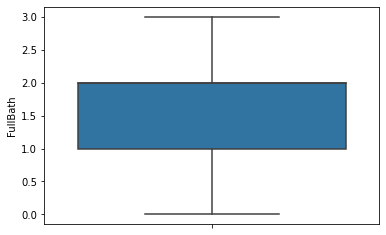

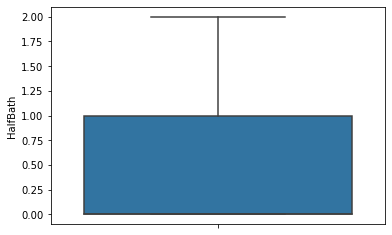

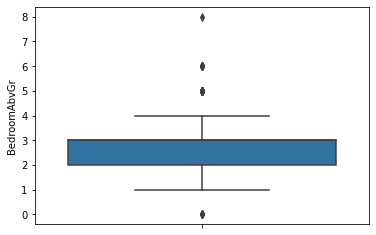

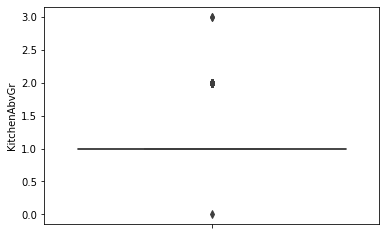

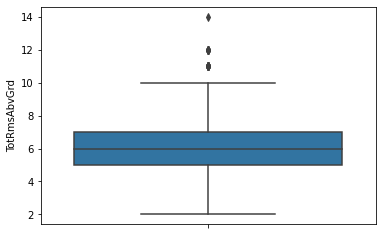

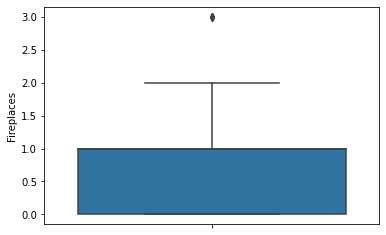

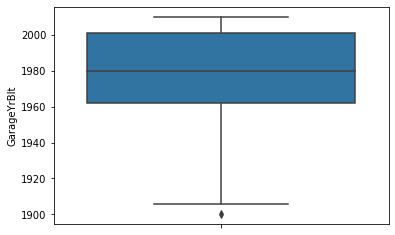

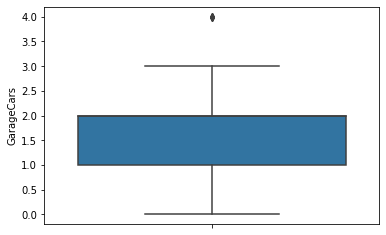

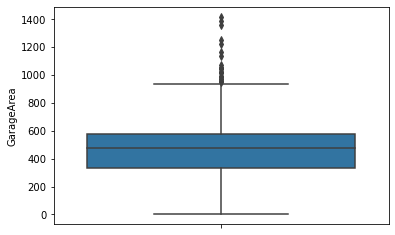

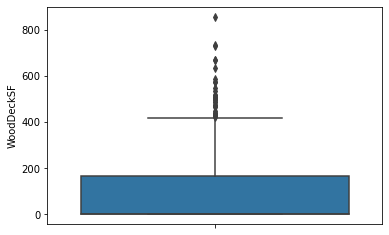

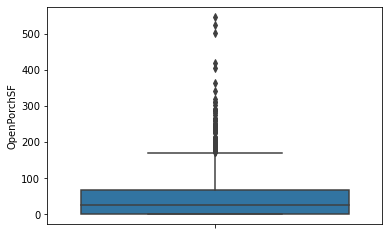

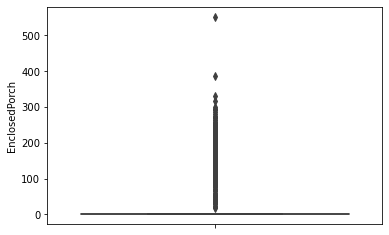

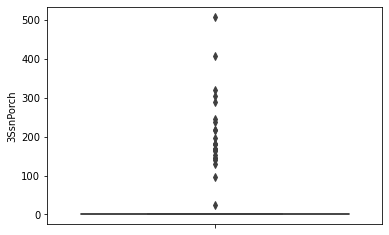

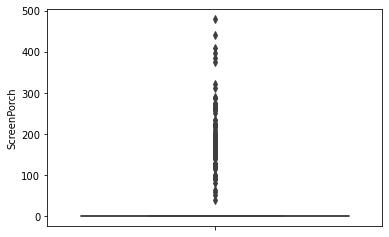

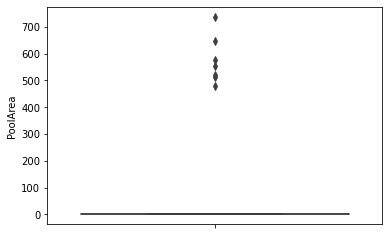

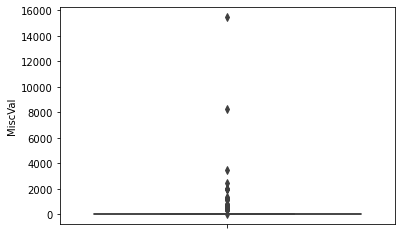

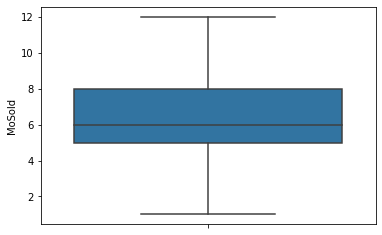

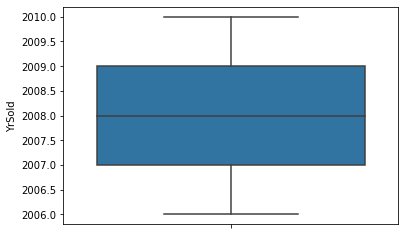

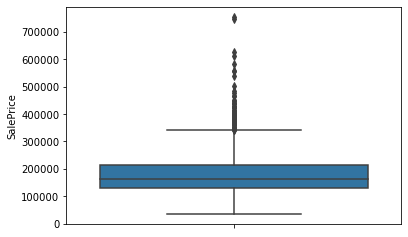

In [19]:
# Boxplot - To observe outliers

for col in num_cols:
    plt.subplots()
    sns.boxplot(y = df[col])

We can observe outliers in the above boxplots

In [20]:
df.describe(percentiles = [0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,80.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2003.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000

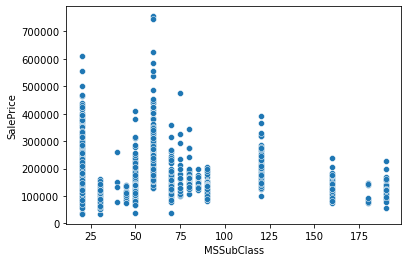

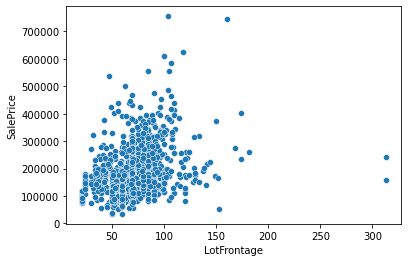

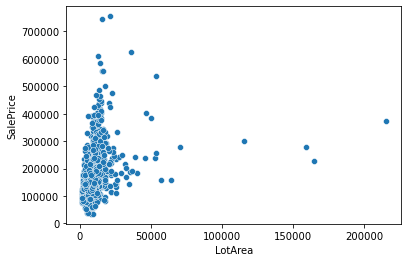

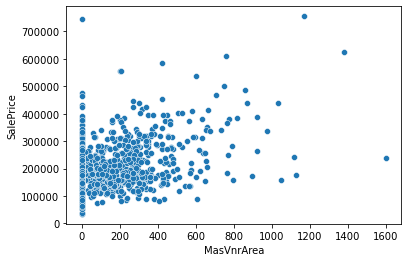

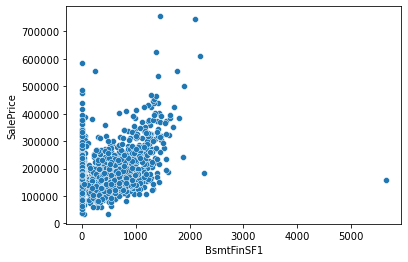

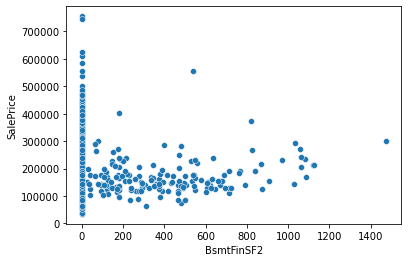

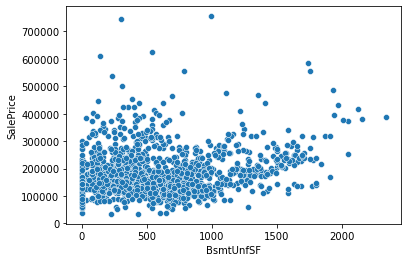

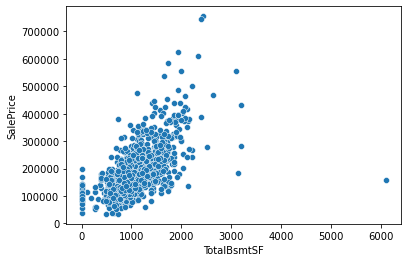

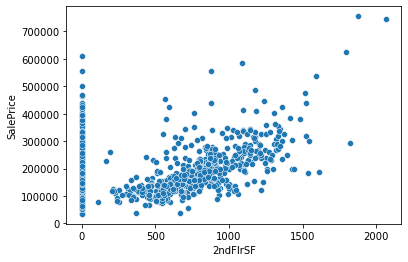

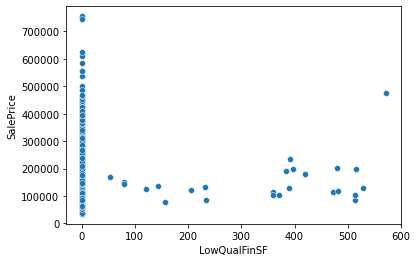

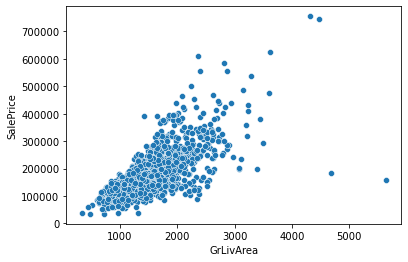

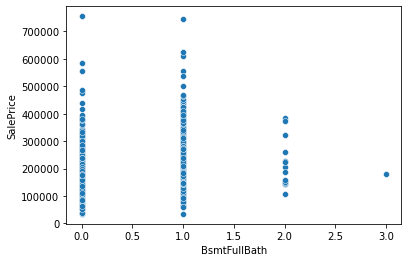

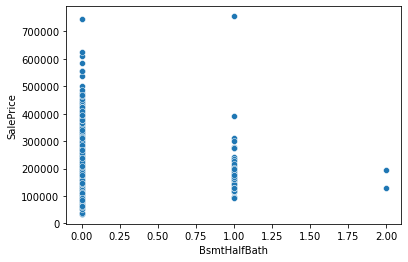

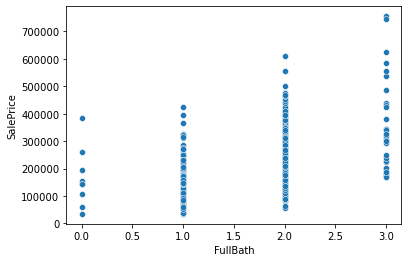

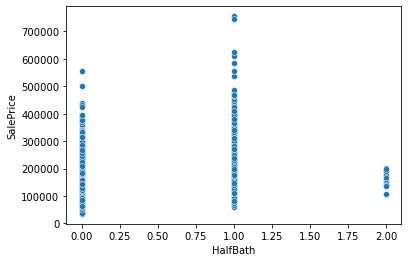

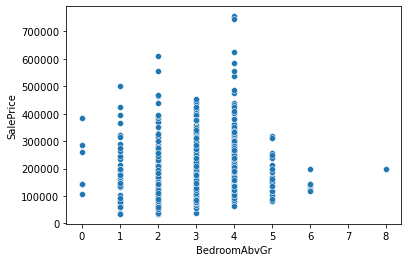

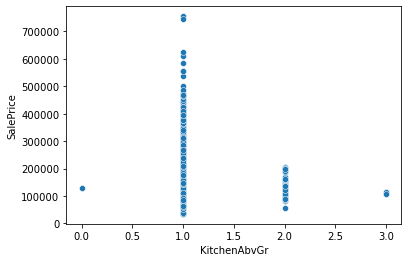

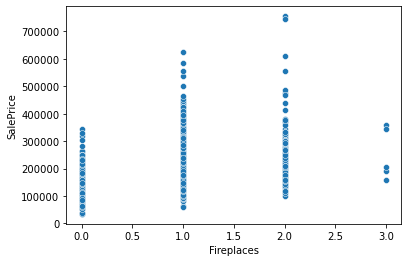

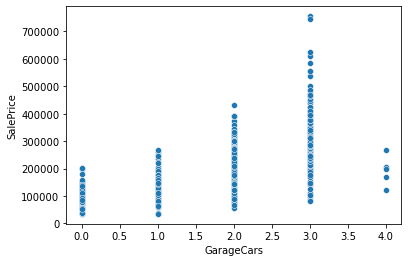

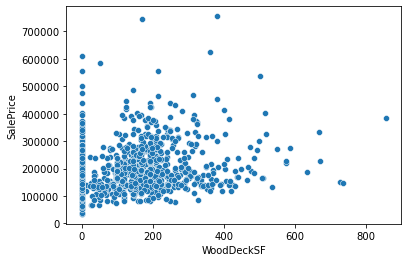

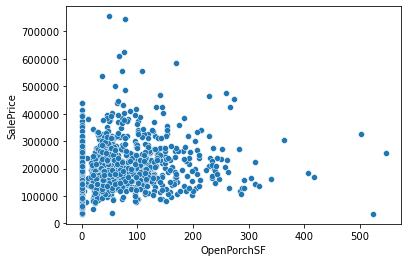

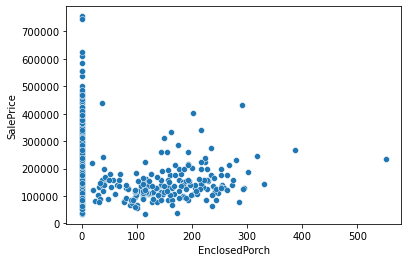

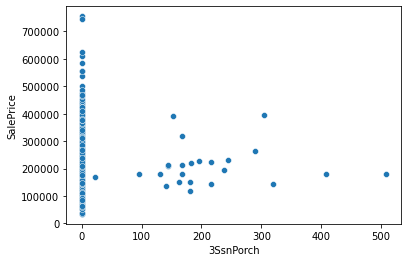

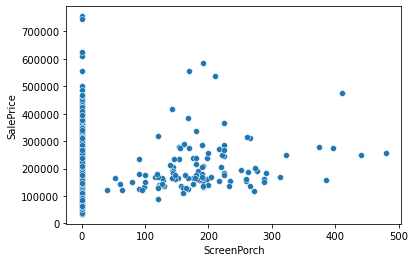

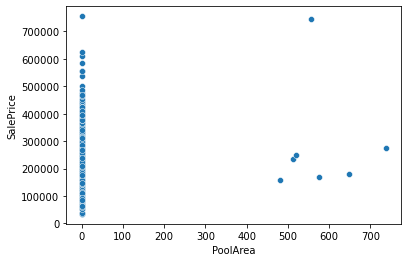

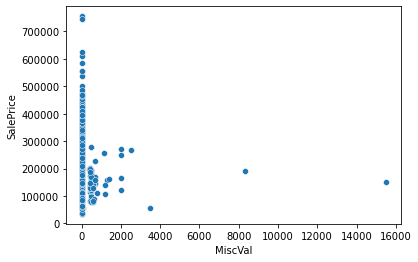

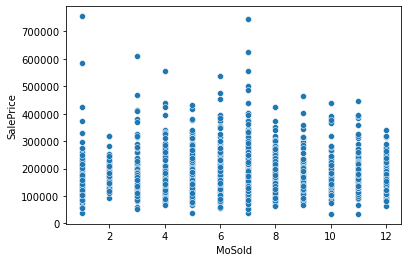

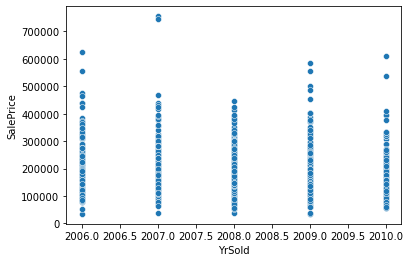

In [21]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
        'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for col in cols:
    plt.subplots()
    sns.scatterplot(x = col, y = "SalePrice", data = df)

Insights : Affect the Sale Price of the House
- Parking for more cars
- More Full Bathrooms
- Newer houses (New and Remodelled)
- Gargage area
- Living area size
- Number of rooms in house

In [22]:
cat_cols.columns

for col in cat_cols:
    print(df[col].value_counts(normalize = True) * 100)

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
No Alley Access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
Sa

In [23]:
# Dropping few columns based on unique values count
cols = ["Street", "Utilities", "Condition2", "RoofMatl", "Heating"]
df = df.drop(cols, axis=1)

cat_cols.drop(cols, axis=1, inplace=True)

In [24]:
df.shape

(1460, 75)

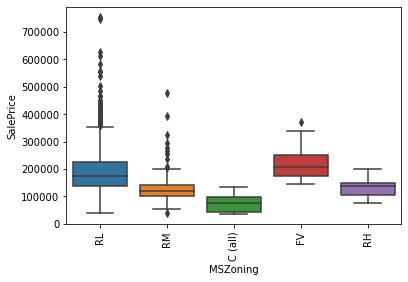

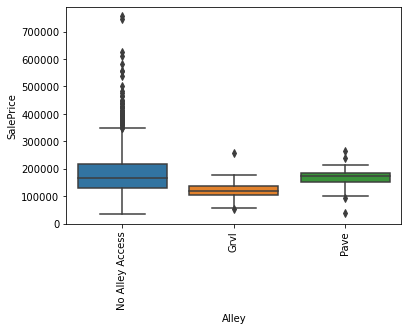

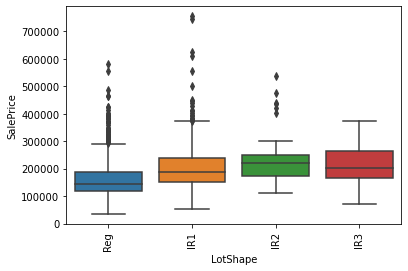

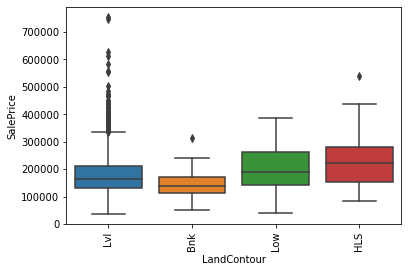

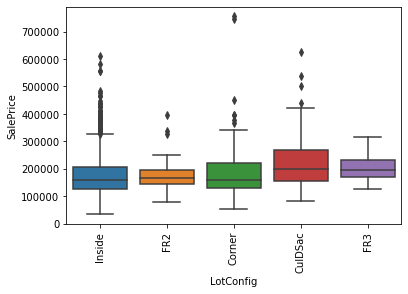

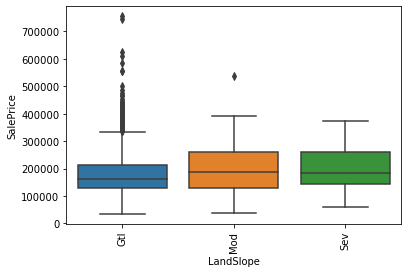

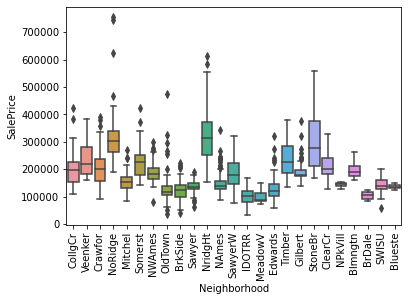

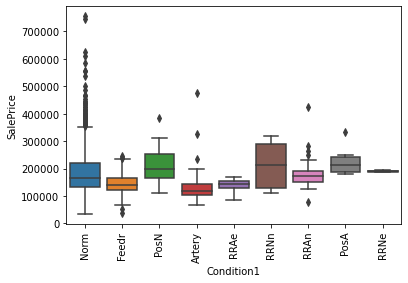

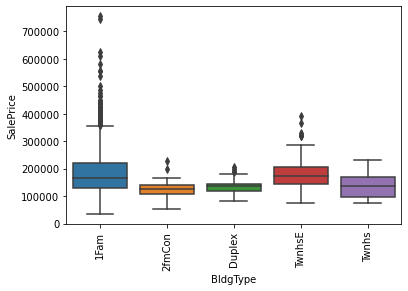

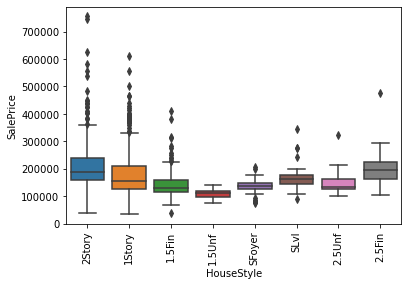

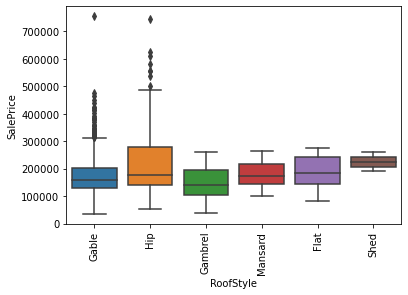

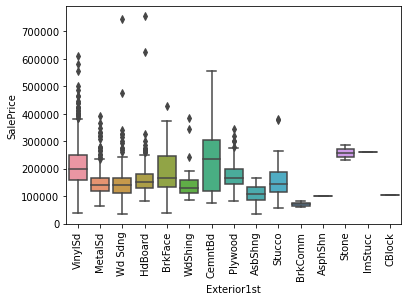

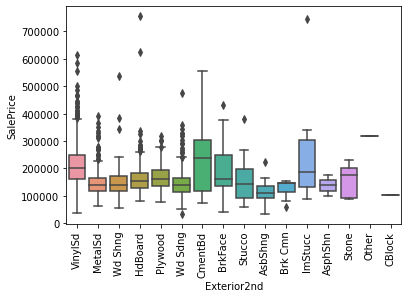

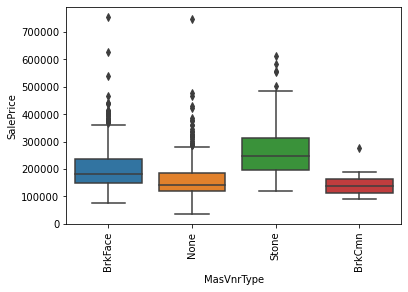

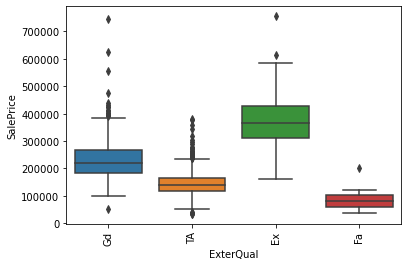

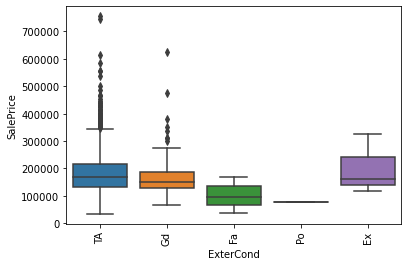

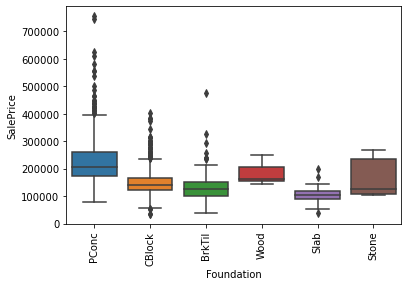

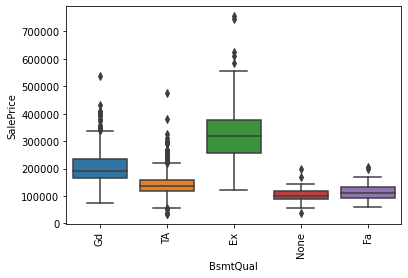

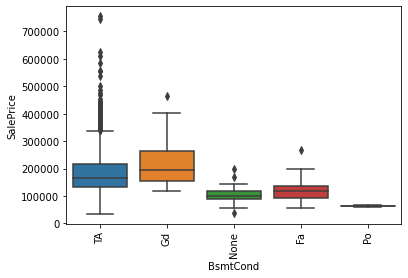

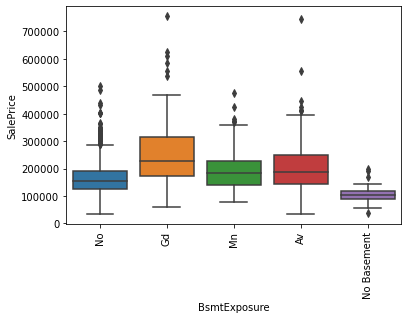

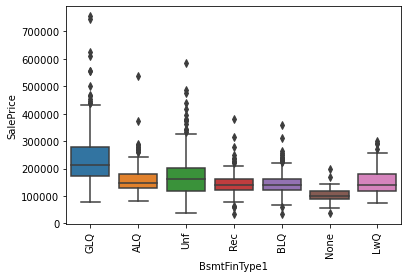

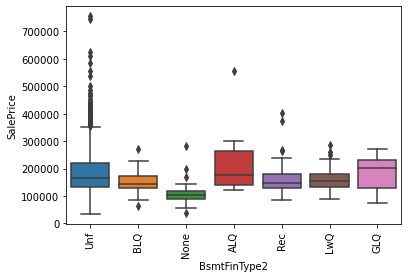

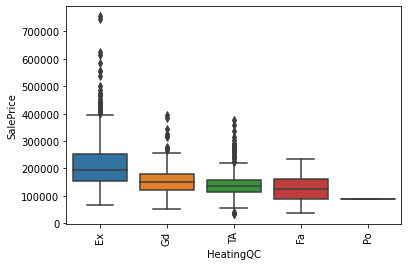

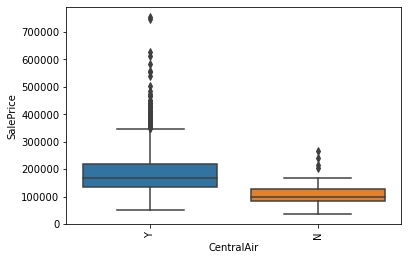

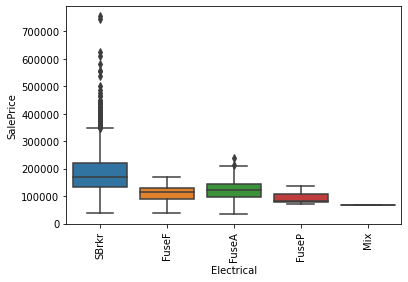

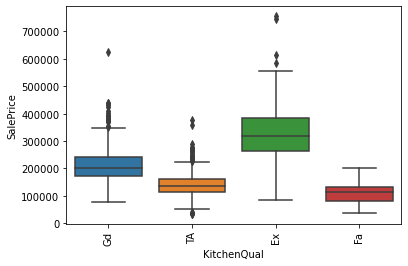

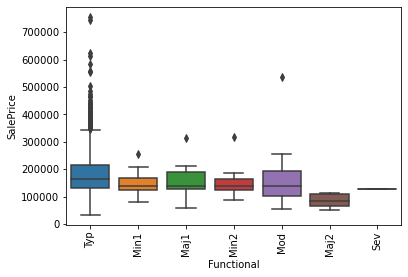

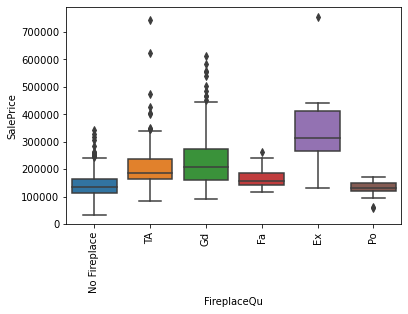

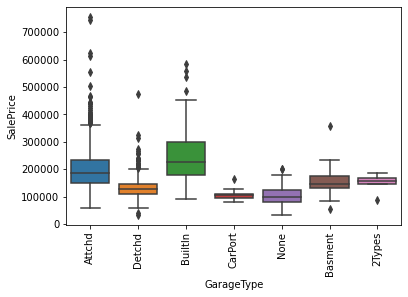

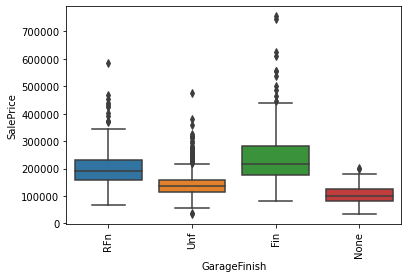

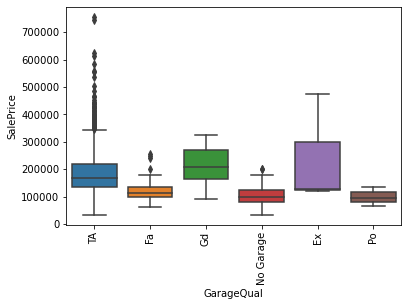

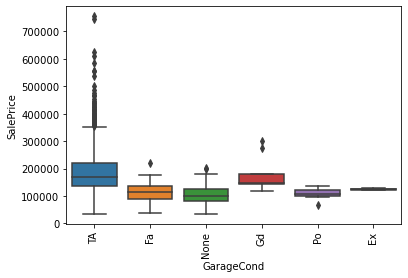

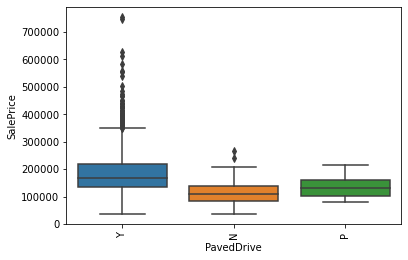

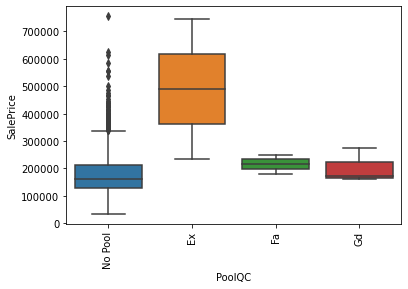

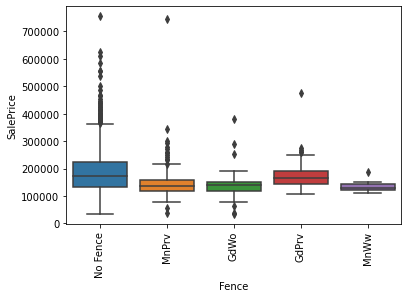

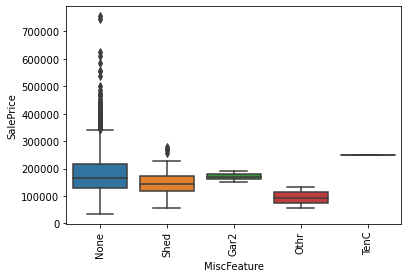

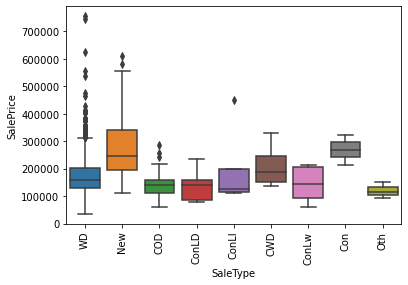

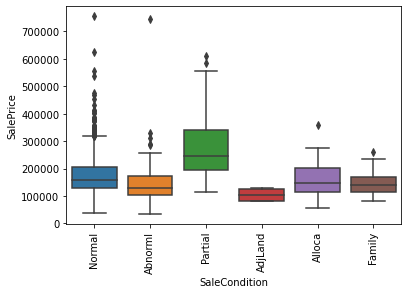

In [25]:
# Plotting categorical columns

for col in cat_cols:
    plt.subplots()
    sns.boxplot(x = col, y = "SalePrice", data = df)
    x=plt.xticks(rotation=90)

Insights from above fig

- 2 Story or 1 Story house style has more sale price.
- Non Alley access has more Sale price in alley
- MSZoning is Residential Low Density
- Cul-de-sac in Lot configuration
- irregular and regular Lotspace has more sale price
- Hillside - Significant slope from side to side
- Within 200' of North-South Railroad
- Moderate Slope
- General condition is normal
- single family detached
- Roof style is Gable & Hip.
- Masonry veneer type is Brick Face or Stone

In [26]:
def map_quality(x):
    return x.map({10 : "Very Excellent", 9 : "Excellent", 8 : "Good", 7 : "Good", 6 : "Average", 5 : "Average", 4 : "Poor", 3 : "Poor", 2 : "Very Poor", 1 : "Very Poor"})

df["OverallQual"] = df[["OverallQual"]].apply(map_quality)
df["OverallCond"] = df[["OverallCond"]].apply(map_quality)

In [27]:
# Deriving new columns

df['AgeYearBuilt'] = df['YrSold']-df['YearBuilt']
df['AgeYearRemodelled'] = df['YrSold']-df['YearRemodAdd']
df['AgeGarage'] = df['YrSold']-df['GarageYrBlt']

In [28]:
# Dropping the columns 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' after deriving new variables

df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1)

In [29]:
df.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,AgeGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,36.547945,22.950000,29.226712
std,42.300571,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.250152,20.640653,24.034844
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,8.000000,4.000000,7.000000
50%,50.000000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000,14.000000,28.000000
75%,70.000000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,54.000000,41.000000,46.000000
max,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,136.000000,60.000000,107.000000


In [30]:
# variable 'AgeYearRemodelled' has minimum value of -1 which is invalid, dropping the row

df = df[~(df['AgeYearRemodelled']==-1)]

In [31]:
df.shape

(1459, 75)

<AxesSubplot:>

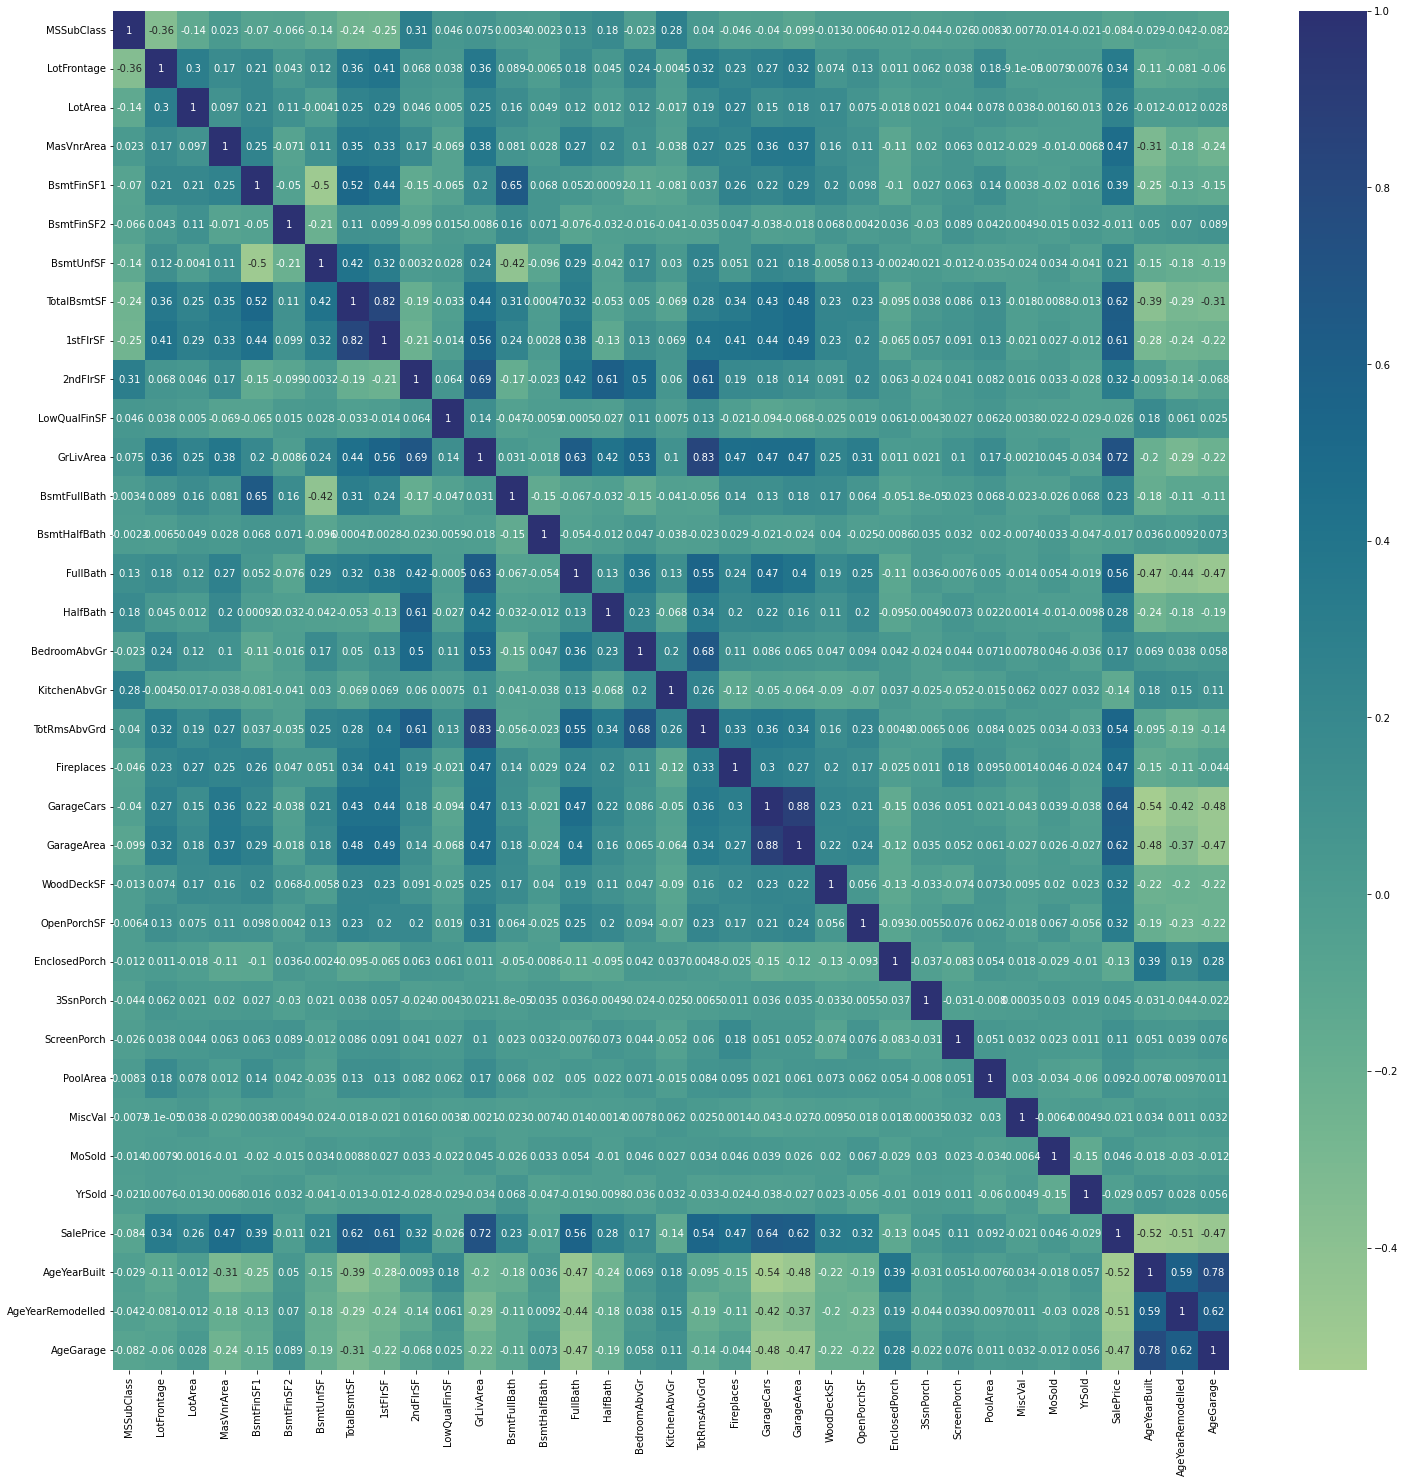

In [32]:
# Correlation details

plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap="crest")


In [33]:
# Dropping columns which has high correlation.

cols = ["TotRmsAbvGrd", "GarageArea", "AgeGarage", "1stFlrSF"]
df = df.drop(cols, axis = 1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

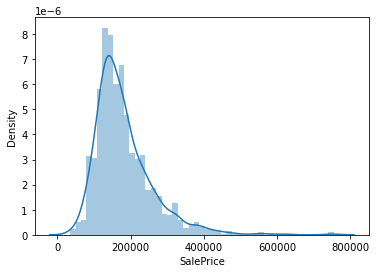

In [34]:
# check for target variable distribution
sns.distplot(df['SalePrice'], hist=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

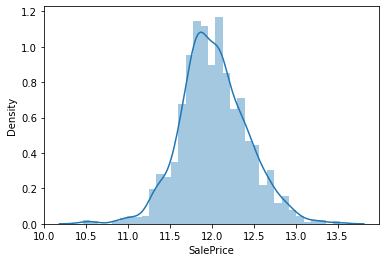

In [35]:
# Target variable needs transformation to remove skewness

# Performing log transformation 
df['SalePrice'] = np.log1p(df['SalePrice'])

# re-checkig the variable after transformation:
sns.distplot(df['SalePrice'], hist=True)


In [36]:
cat_cols = df.select_dtypes(include = "object")
num_cols = df.select_dtypes(exclude = "object")

df.shape

(1459, 71)

In [37]:
# Creating dummy variables for categorical variables
dummies = pd.get_dummies(df[cat_cols.columns], drop_first = True)
df = pd.concat([df, dummies], axis = 1)

# Drop original categorical columns
df = df.drop(cat_cols.columns, axis = 1)

In [38]:
df.shape

(1459, 242)

### Model Building

In [39]:
# Data split - train and test
np.random.seed(42)
data_train, data_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [40]:
# Scaling the numeric features
scaler = MinMaxScaler()
num_features = list(num_cols.columns)

In [41]:
data_train[num_features] = scaler.fit_transform(data_train[num_features])
data_train.head()

data_test[num_features] =scaler.transform(data_test[num_features])
data_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1322,0.235294,0.294521,0.041534,0.000000,0.119419,0.0,0.032534,0.122750,0.417433,0.0,0.285

In [42]:
# independent and dependent variables - train and test

y_train = data_train.pop("SalePrice")
X_train = data_train

y_test = data_test.pop("SalePrice")
X_test = data_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1021, 241), (1021,), (438, 241), (438,))

In [43]:
# using RFE to select the top 30 features

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=30, step = 1)
rfe_fit = rfe.fit(X_train, y_train)

In [44]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 209),
 ('LotFrontage', False, 106),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 165),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 104),
 ('LowQualFinSF', False, 90),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 30),
 ('BsmtHalfBath', False, 151),
 ('FullBath', False, 83),
 ('HalfBath', False, 105),
 ('BedroomAbvGr', False, 181),
 ('KitchenAbvGr', False, 208),
 ('Fireplaces', False, 211),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 44),
 ('OpenPorchSF', False, 113),
 ('EnclosedPorch', False, 22),
 ('3SsnPorch', False, 28),
 ('ScreenPorch', False, 21),
 ('PoolArea', True, 1),
 ('MiscVal', False, 142),
 ('MoSold', False, 206),
 ('YrSold', False, 210),
 ('AgeYearBuilt', False, 13),
 ('AgeYearRemodelled', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_No Alley Access', False, 92),
 ('Alley_Pave', F

In [45]:
# Picking the features with rank =1

rfe_ranking = pd.DataFrame({'rank' : rfe_fit.ranking_, 'support' : rfe_fit.support_, 'features' : X_train.columns}).sort_values(by = 'rank', ascending = True)

selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1, 'features'].values
selected_features

array(['MiscFeature_TenC', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'GarageType_Detchd', 'GarageType_CarPort', 'MiscFeature_None',
       'PoolArea', 'GarageCars', 'MiscFeature_Othr', 'GarageType_Basment',
       'AgeYearRemodelled', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'GarageType_BuiltIn', 'GarageType_Attchd',
       'SaleType_ConLI', 'MiscFeature_Shed', 'PoolQC_No Pool',
       'PoolQC_Gd', 'PoolQC_Fa', 'LotArea', 'GrLivArea',
       'Functional_Maj2', 'BsmtFinSF1', 'GarageQual_Fa', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2'], dtype=object)

In [46]:
# Updated training and testing data

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [47]:
# Building linear regression model

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [48]:
print(lm1.coef_)
print(lm1.intercept_)

[-3.34357835e+11 -1.54937744e-01 -3.77780944e-02  3.15475464e-02
  2.95521617e-02  1.27059937e-01  2.79866791e+00  1.26406670e-01
  1.08666480e-01  4.50975895e-02 -8.37249756e-02  1.83540821e-01
  1.18999481e-01  1.56486511e-01  1.22827530e-01  7.02466965e-02
  5.29212952e-02 -1.21754527e-01  1.16888046e-01  2.08897400e+00
 -4.41091776e-01  3.34357835e+11  9.71841812e-02  5.39428711e-01
 -1.11752868e-01  2.61070251e-01 -1.82962418e-02  2.59395599e-01
  3.56788635e-02  2.39524841e-02]
-2.11513662286498


In [49]:
y_pred_train = lm1.predict(X_train)
y_pred_test = lm1.predict(X_test)

In [50]:
# Metrics evaluation

lm1_r2_train = r2_score(y_train, y_pred_train)
lm1_r2_test = r2_score(y_test, y_pred_test)

lm1_mse_train = mean_squared_error(y_train, y_pred_train)
lm1_mse_test = mean_squared_error(y_test, y_pred_test)

lm1_rmse_train = lm1_mse_train ** 0.5
lm1_rmse_test = lm1_mse_test ** 0.5

print("Train R2 score: ", lm1_r2_train)
print("Test R2 score: ", lm1_r2_test)
print()
print("Train MSE: ", lm1_mse_train)
print("Test MSE: ", lm1_mse_test)
print()
print("Train RMSE: ", lm1_rmse_train)
print("Test RMSE: ", lm1_rmse_test)

Train R2 score:  0.8527661599302554
Test R2 score:  -1.5416194224274991e+22

Train MSE:  0.0025060070194093107
Test MSE:  2.552400952741609e+20

Train RMSE:  0.050060034153097725
Test RMSE:  15976235328.579788


In [51]:
# Storing all results 

lm_metric = [round(lm1_r2_train,3), round(lm1_r2_test,3), 
             round(lm1_mse_train,3), round(lm1_mse_test,3), 
             round(lm1_rmse_train,3), round(lm1_rmse_test,3)]

lm_metric

[0.853,
 -1.5416194224274991e+22,
 0.003,
 2.552400952741609e+20,
 0.05,
 15976235328.58]

In [52]:
# Params for tuning the regularized model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [53]:
# Trying Ridge method

ridge = Ridge()
folds = 5

model_ridge = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,
                        verbose = 1)

model_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Check the best alpha value

model_ridge.best_params_

{'alpha': 0.01}

In [55]:
# Using the best alpha value
alpha = 0.01
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [56]:
# model co-efficients
ridge.coef_

array([ 0.08324409, -0.1562301 , -0.03668525,  0.02998641,  0.02810914,
        0.12079046,  2.19359359,  0.13154382,  0.10049622,  0.04349553,
       -0.08349449,  0.18177409,  0.11737244,  0.15554669,  0.12134211,
        0.06889482,  0.05259783, -0.11584507,  0.11015588,  1.63893868,
       -0.39082043,  0.08324409,  0.09647108,  0.53420644, -0.11141182,
        0.24715461, -0.01809248,  0.24594106,  0.03468054,  0.02373162])

In [57]:
# Predicted results

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [58]:
# Metrics evaluation

ridge_r2_train = r2_score(y_train, y_pred_train)
ridge_r2_test = r2_score(y_test, y_pred_test)

ridge_mse_train = mean_squared_error(y_train, y_pred_train)
ridge_mse_test = mean_squared_error(y_test, y_pred_test)

ridge_rmse_train = ridge_mse_train ** 0.5
ridge_rmse_test = ridge_mse_test ** 0.5

print("Train R2 score: ", ridge_r2_train)
print("Test R2 score: ", ridge_r2_test)
print()
print("Train MSE: ", ridge_mse_train)
print("Test MSE: ", ridge_mse_test)
print()
print("Train RMSE: ", ridge_rmse_train)
print("Test RMSE: ", ridge_rmse_test)

Train R2 score:  0.8515575896823354
Test R2 score:  0.8182274393837714

Train MSE:  0.0025265775996733456
Test MSE:  0.003009539515067722

Train RMSE:  0.05026507335788286
Test RMSE:  0.0548592700923711


In [59]:
 #Storing all results 

ridge_metric = [round(ridge_r2_train,3), round(ridge_r2_test,3), 
                round(ridge_mse_train,3), round(ridge_mse_test,3), 
                round(ridge_rmse_train,3), round(ridge_rmse_test,3)]

ridge_metric

[0.852, 0.818, 0.003, 0.003, 0.05, 0.055]

In [60]:
# using GridSearchCV with 5 folds to find the best alpha for Lasso Model
lasso = Lasso()
folds = 5

model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Checking the best alpha value

model_lasso.best_params_

{'alpha': 0.0001}

In [62]:
# using the best alpha for Lasso model

alpha = 0.0001
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [63]:
# Co-efficients given by model

lasso.coef_

array([ 0.        , -0.11360732, -0.        ,  0.01508568,  0.        ,
        0.01423451,  0.        ,  0.15939236, -0.        ,  0.01615783,
       -0.08457459,  0.10327606,  0.03221897,  0.08436024,  0.04531436,
        0.05190093,  0.04437168, -0.        ,  0.        ,  0.02979207,
       -0.14618862,  0.        ,  0.06159071,  0.5136387 , -0.077688  ,
        0.11463652, -0.00918995,  0.2520453 , -0.        ,  0.00630889])

In [64]:
# Predicted results

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [65]:
# Metic Evaluation
lasso_r2_train = r2_score(y_train, y_pred_train)
lasso_r2_test = r2_score(y_test, y_pred_test)

lasso_mse_train = mean_squared_error(y_train, y_pred_train)
lasso_mse_test = mean_squared_error(y_test, y_pred_test)

lasso_rmse_train = lasso_mse_train ** 0.5
lasso_rmse_test = lasso_mse_test ** 0.5

print("Train R2 score: ", lasso_r2_train)
print("Test R2 score: ", lasso_r2_test)
print()
print("Train MSE: ", lasso_mse_train)
print("Test MSE: ", lasso_mse_test)
print()
print("Train RMSE: ", lasso_rmse_train)
print("Test RMSE: ", lasso_rmse_test)

Train R2 score:  0.822500680561198
Test R2 score:  0.8325534134606531

Train MSE:  0.0030211433746705585
Test MSE:  0.0027723497823047114

Train RMSE:  0.05496492858787828
Test RMSE:  0.052653108002327


In [66]:
# Storing results
lasso_metric = [round(lasso_r2_train,3), round(lasso_r2_test,3), 
                round(lasso_mse_train,3), round(lasso_mse_test,3), 
                round(lasso_rmse_train,3), round(lasso_rmse_test,3)]

lasso_metric

[0.823, 0.833, 0.003, 0.003, 0.055, 0.053]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

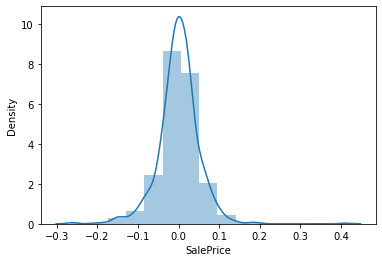

In [67]:
# Residual Analysis

y_pred_train = lm1.predict(X_train)
sns.distplot(y_train - y_pred_train, bins = 15)

<AxesSubplot:ylabel='SalePrice'>

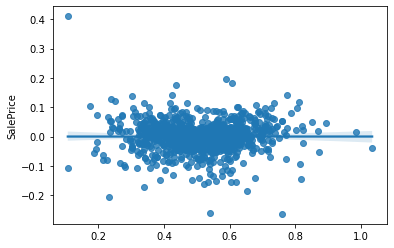

In [68]:
sns.regplot(y_pred_train, y_train - y_pred_train)

Insights :
- Residuals follow normal distribution around mean 0

In [69]:
# Comparing metrics

metrics = pd.DataFrame({"Metric" : ["Train R2", "Test R2", "Train MSE", "Test MSE", "Train RMSE", "Test RMSE"],
                      "Linear Regression" : lm_metric,
                      "Ridge" : ridge_metric,
                      "Lasso" : lasso_metric})

metrics

,Metric,Linear Regression,Ridge,Lasso
0,Train R2,8.530000e-01,0.852,0.823
1,Test R2,-1.541619e+22,0.818,0.833
2,Train MSE,3.000000e-03,0.003,0.003
3,Test MSE,2.552401e+20,0.003,0.003
4,Train RMSE,5.000000e-02,0.050,0.055
5,Test RMSE,1.597624e+10,0.055,0.053


Insights : 
- Ridge and Lasso are performing better than linear Regression model

In [70]:
# Comparing co-efficients

coefficients = pd.DataFrame({"Feature" : X_train.columns,
                     "Linear Regression" : lm1.coef_,
                     "Ridge" : ridge.coef_,
                     "Lasso" : lasso.coef_})

coefficients

,Feature,Linear Regression,Ridge,Lasso
0,MiscFeature_TenC,-3.343578e+11,0.083244,0.000000
1,Exterior1st_BrkComm,-1.549377e-01,-0.156230,-0.113607
2,Exterior1st_CBlock,-3.777809e-02,-0.036685,-0.000000
3,GarageType_Detchd,3.154755e-02,0.029986,0.015086
4,GarageType_CarPort,2.955216e-02,0.028109,0.000000
5,MiscFeature_None,1.270599e-01,0.120790,0.014235
6,PoolArea,2.798668e+00,2.193594,0.000000
7,GarageCars,1.264067e-01,0.131544,0.159392
8,MiscFeature_Othr,1.086665e-01,0.100496,-0.000000
9,GarageType_Basment,4.509759e-02,0.043496,0.016158


Insights:
- Lasso model pushed few of the coefficients to zero

Lasso Model:

- Optimal value of alpha for Lasso regression is 0.0001
- Train and Test R2 values are 0.823 and 0.833
